<a href="https://colab.research.google.com/github/Nayana-manoharan/NOAA-Temperature-Analysis/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**

**This project analyzes NOAA temperature data near Ann Arbor, Michigan, from 2005 to 2015. It visualizes record high and low temperatures, highlights extreme events in 2015, and maps weather stations in the region.**

# **Features**

Line graph of record highs/lows (2005-2014) with shaded areas

Scatter overlay of 2015 extreme temperatures

Leap day removal for consistency

Map visualization of station locations

Temperature summary plot for 2015

# **Import the required libraries**

In [49]:
# For handling and analyzing structured data (CSV files).
import pandas as pd
# For numerical operations and efficient data manipulation
import numpy as np
# For creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt
# Enhances matplotlib with more attractive statistical graphics.
import seaborn as sns
# Extends pandas to handle spatial/geographic data.
import geopandas as gpd
# Helps create and manipulate geometric objects (points, lines, polygons).
from shapely.geometry import Point
# Used for creating interactive maps with geographic data.
import folium

# **Dataset**

**The data comes from the National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network (GHCN-Daily)] and consists of:**

temperature.csv: Temperature observations (2005-2015)

BinSize.csv: Weather station details.

In [50]:
# Load dataset
temp_df = pd.read_csv("temperature.csv")
binsize_df = pd.read_csv("BinSize.csv")

In [51]:
temp_df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [52]:
binsize_df

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0,5.579578e+06,2.816905e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
1,AEM00041194,25.255,55.364,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0,5.567782e+06,2.808232e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
2,AEM00041217,24.433,54.651,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0,5.532707e+06,2.716829e+06,5497601.479782179 to 5594934.908498545,2674932.047007587 to 2772265.4757239525,"5497601.479782179 to 5594934.908498545, 267493...",35c9093084d26708afc5b482ea15ba52e3f20fb7cd781f...
3,AEM00041218,24.262,55.609,264.9,NaN,AL AIN INTL,NaN,NaN,41218.0,5.637301e+06,2.697815e+06,5594934.908498544 to 5692268.33721491,2674932.047007587 to 2772265.4757239525,"5594934.908498544 to 5692268.33721491, 2674932...",2a6a7edad90579049fd1b3c3a990e8a8be90cb1975118e...
4,AFM00040990,31.500,65.850,1010.0,NaN,KANDAHAR AIRPORT,NaN,NaN,40990.0,6.243199e+06,3.502645e+06,6178935.480796736 to 6276268.909513102,3453599.476738509 to 3550932.9054548745,"6178935.480796736 to 6276268.909513102, 345359...",039e75bbef55baa3fecc0568dc3b245666a98b1bcba6b4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18254,ZA000067633,-15.250,23.150,1053.0,NaN,MONGU,GSN,NaN,67633.0,2.483523e+06,-1.695725e+06,2480265.1895748563 to 2577598.618291222,-1705072.2452288494 to -1607738.8165124834,"2480265.1895748563 to 2577598.618291222, -1705...",c1f39870d7200ac9fa7748c4d6688cbbe48cd3ac4c4a9e...
18255,ZA000067743,-17.817,25.817,986.0,NaN,LIVINGSTONE,GSN,NaN,67743.0,2.733040e+06,-1.981163e+06,2674932.047007587 to 2772265.4757239525,-1997072.531377945 to -1899739.1026615791,"2674932.047007587 to 2772265.4757239525, -1997...",25cba19cddf24c1999b6b8812cbccbb2fc8f3e64715d73...
18256,ZI000067775,-17.917,31.133,1480.0,NaN,HARARE (KUTSAGA),GSN,NaN,67775.0,3.293948e+06,-1.992282e+06,3258932.6193057783 to 3356266.048022144,-1997072.531377945 to -1899739.1026615791,"3258932.6193057783 to 3356266.048022144, -1997...",6c7f11051d64bc4f778b4d2417b11ec72b4f655aed5fea...
18257,ZI000067975,-20.067,30.867,1095.0,NaN,MASVINGO,NaN,NaN,67975.0,3.223893e+06,-2.231352e+06,3161599.190589413 to 3258932.6193057788,-2289072.817527041 to -2191739.388810675,"3161599.190589413 to 3258932.6193057788, -2289...",1d695305fb4a37e8903ca1b196f14d940b84cbc1c31d4b...


# **Convert Date Column to DateTime Format**

Converts the Date column to datetime format for easier manipulation.

Extracts the Year from the Date column.

Extracts the Month and Day (formatted as MM-DD) to analyze data by day of the year

In [53]:

temp_df['Date'] = pd.to_datetime(temp_df['Date'])
temp_df['Year'] = temp_df['Date'].dt.year
temp_df['Day_of_Year'] = temp_df['Date'].dt.strftime('%m-%d')


# **Remove Leap Year Data (February 29)**
Removes February 29th to ensure all years have the same number of days.

In [54]:

temp_df = temp_df[temp_df['Day_of_Year'] != '02-29']
temp_df


,ID,Date,Element,Data_Value,Year,Day_of_Year
0,USW00094889,2014-11-12,TMAX,22,2014,11-12
1,USC00208972,2009-04-29,TMIN,56,2009,04-29
2,USC00200032,2008-05-26,TMAX,278,2008,05-26
3,USC00205563,2005-11-11,TMAX,139,2005,11-11
4,USC00200230,2014-02-27,TMAX,-106,2014,02-27
...,...,...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256,2015,06-09
165081,USC00205822,2009-10-06,TMAX,167,2009,10-06
165082,USC00205050,2014-07-14,TMAX,283,2014,07-14
165083,USC00200230,2006-11-29,TMIN,117,2006,11-29


# **Convert Temperature Data to Celsius**
The dataset stores temperature values in tenths of a degree Celsius.
Divides values by 10 to convert them to standard degrees Celsius.

In [55]:

temp_df['Data_Value'] = temp_df['Data_Value'] / 10.0

<ipython-input-55-d00b9e550016>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Data_Value'] = temp_df['Data_Value'] / 10.0


# **Separate Data for Historical (2005-2014) and 2015**
**Filters data into two groups:**

temp_2005_2014: Contains data from 2005 to 2014.

temp_2015: Contains data from only 2015.


In [56]:

temp_2005_2014 = temp_df[(temp_df['Year'] >= 2005) & (temp_df['Year'] <= 2014)]
temp_2015 = temp_df[temp_df['Year'] == 2015]

# **Compute Record Highs and Lows (2005-2014)**
**Extracts:**

Record highs (TMAX) → Maximum temperature for each day-of-year (2005-2014).

Record lows (TMIN) → Minimum temperature for each day-of-year (2005-2014).

Uses groupby('Day_of_Year') to group by day of the year, then applies .max() or .min().

In [57]:

record_highs = temp_2005_2014[temp_2005_2014['Element'] == 'TMAX'].groupby('Day_of_Year')['Data_Value'].max()
record_lows = temp_2005_2014[temp_2005_2014['Element'] == 'TMIN'].groupby('Day_of_Year')['Data_Value'].min()

In [58]:
record_highs

,Data_Value
Day_of_Year,
01-01,15.6
01-02,13.9
01-03,13.3
01-04,10.6
01-05,12.8
...,...
12-27,18.9
12-28,19.4
12-29,12.8


In [59]:
record_lows

,Data_Value
Day_of_Year,
01-01,-16.0
01-02,-26.7
01-03,-26.7
01-04,-26.1
01-05,-15.0
...,...
12-27,-13.8
12-28,-16.6
12-29,-15.0


# **Identify Record-Breaking Temperatures in 2015**

Finds 2015 temperature records higher than the 2005-2014 highs.

Finds 2015 temperature records lower than the 2005-2014 lows.

These are extreme temperature events in 2015.

In [60]:
# Compute 2015 breaking records
high_breakers = temp_2015[temp_2015['Element'] == 'TMAX'].groupby('Day_of_Year')['Data_Value'].max()
high_breakers = high_breakers[high_breakers > record_highs]

low_breakers = temp_2015[temp_2015['Element'] == 'TMIN'].groupby('Day_of_Year')['Data_Value'].min()
low_breakers = low_breakers[low_breakers < record_lows]

In [61]:
high_breakers

,Data_Value
Day_of_Year,
02-09,8.3
04-17,27.8
05-07,30.6
05-08,33.3
05-11,30.6
05-18,31.7
07-27,33.9
07-29,36.1
08-19,32.8


In [62]:
low_breakers

,Data_Value
Day_of_Year,
01-05,-15.5
01-11,-20.0
02-03,-23.8
02-14,-23.9
02-15,-26.0
02-16,-29.4
02-17,-27.2
02-19,-26.0
02-20,-34.3


# **Convert Days to DateTime Format for Plotting**
Converts the Day_of_Year index to datetime format for proper plotting.

In [63]:
days = pd.to_datetime(record_highs.index, format='%m-%d')
days

DatetimeIndex(['1900-01-01', '1900-01-02', '1900-01-03', '1900-01-04',
               '1900-01-05', '1900-01-06', '1900-01-07', '1900-01-08',
               '1900-01-09', '1900-01-10',
               ...
               '1900-12-22', '1900-12-23', '1900-12-24', '1900-12-25',
               '1900-12-26', '1900-12-27', '1900-12-28', '1900-12-29',
               '1900-12-30', '1900-12-31'],
              dtype='datetime64[ns]', name='Day_of_Year', length=365, freq=None)

# **Plot Record Highs, Lows, and 2015 Extreme Points**
Creates a line plot of historical record highs (blue) and record lows (red).

Shades the area between them in yellow.

Overlays 2015 extreme points using scatter plots.

Uses:

Black triangles (🔺) for 2015 highs breaking records.

Black downward triangles (🔻) for 2015 lows breaking records.

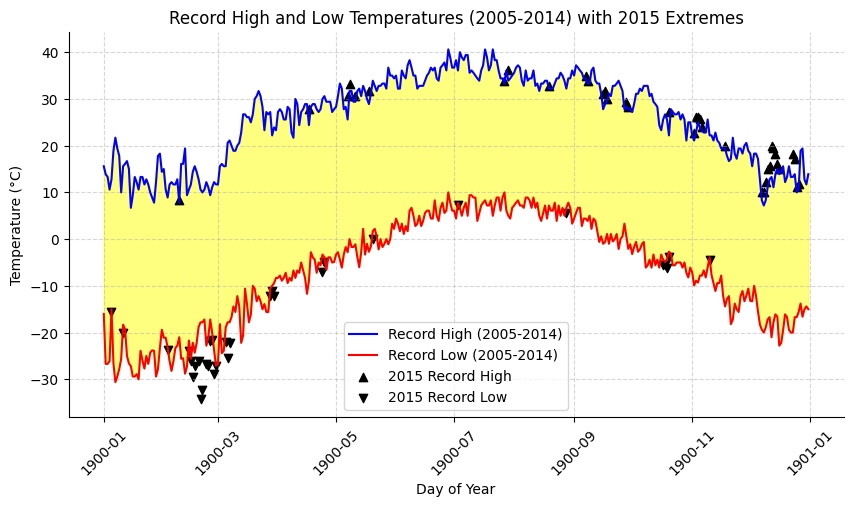

In [64]:

plt.figure(figsize=(10, 5))
plt.plot(days, record_highs.values, color='blue', label='Record High (2005-2014)')
plt.plot(days, record_lows.values, color='red', label='Record Low (2005-2014)')
plt.fill_between(days, record_highs.values, record_lows.values, color='yellow', alpha=0.5)
plt.scatter(pd.to_datetime(high_breakers.index, format='%m-%d'), high_breakers.values, color='black', marker='^', label='2015 Record High')
plt.scatter(pd.to_datetime(low_breakers.index, format='%m-%d'), low_breakers.values, color='black', marker='v', label='2015 Record Low')
plt.xticks(rotation=45)
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.title('Record High and Low Temperatures (2005-2014) with 2015 Extremes')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)


# Remove unnecessary borders for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.show()

# **interactive map using Folium.**
filters weather stations near Ann Arbor, Michigan, and plots them.


In [65]:
# 5 Map weather stations near Ann Arbor, Michigan
ann_arbor_stations = binsize_df[(binsize_df['LATITUDE'].between(41.5, 43.0)) &
                                (binsize_df['LONGITUDE'].between(-84.5, -83.0))]
ann_arbor_map = folium.Map(location=[42.28, -83.73], zoom_start=9)

for _, row in ann_arbor_stations.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=row['NAME'],
        icon=folium.Icon(color='blue', icon='cloud')
    ).add_to(ann_arbor_map)

ann_arbor_map


# **2015 daily temperature summary for Ann Arbor, Michigan**

groups temperature data by day of the year, extracting maximum and minimum temperatures. The plot displays these values using orange (max) and cyan (min) lines, with a gray shaded region between them. The x-axis represents days of the year, and the y-axis shows temperature in °C. Gridlines and labels enhance

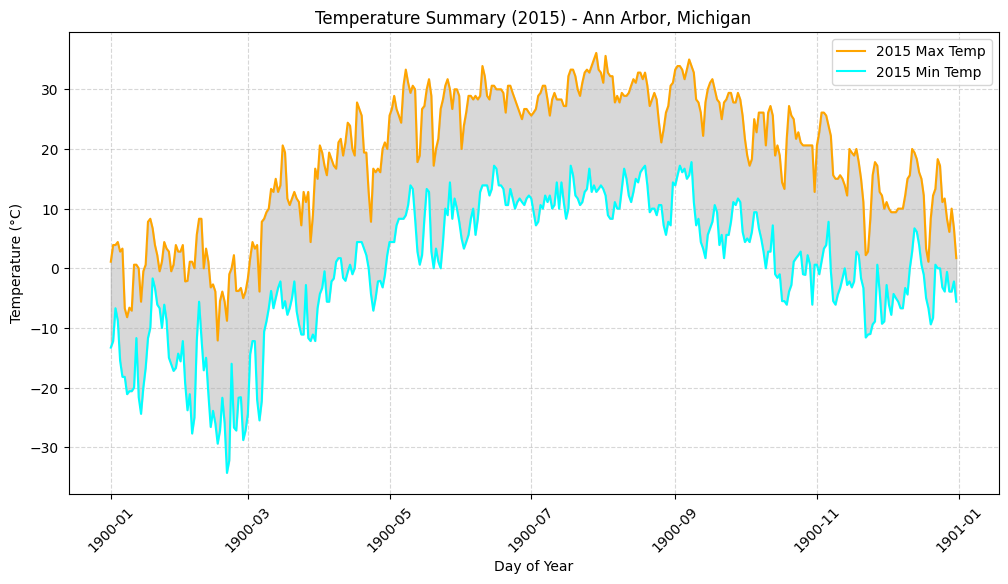

In [66]:
# Plot Temperature Summary for Ann Arbor (2015)
temp_ann_arbor_2015 = temp_2015.groupby('Day_of_Year')['Data_Value'].agg(['max', 'min'])

plt.figure(figsize=(12, 6))
plt.plot(days, temp_ann_arbor_2015['max'].values, color='orange', label='2015 Max Temp')
plt.plot(days, temp_ann_arbor_2015['min'].values, color='cyan', label='2015 Min Temp')
plt.fill_between(days, temp_ann_arbor_2015['max'].values, temp_ann_arbor_2015['min'].values, color='gray', alpha=0.3)
plt.xticks(rotation=45)
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Summary (2015) - Ann Arbor, Michigan')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
